In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
grid_width = 5
grid_height = 5
start_state = (0,0)
cheese_state = (4,4)
trap_states = [(1,1), (2,2), (3,3)]

In [3]:
actions = [(0,-1), (0,1), (-1,0), (1,0)]
action_names = ['Up', 'Down', 'Left', 'Right']

In [4]:
q_table = np.zeros((grid_width, grid_height, len(actions)))

In [5]:
q_table

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [6]:
#hyperparameter
epoch = 1000
max_steps = 100
learning_rate = 0.8
discount_factor = 0.9
exploration_prob = 0.2

In [7]:
#store the total reward value each time the exploration ended in each iteration
total_reward_each_epoch = [] 

In [8]:
#function epsilon-greedy
def choose_action(state):
    if(random.uniform(0,1) < exploration_prob):
        return random.randint(0,len(actions) - 1)
    else:
        return np.argmax(q_table[state])

In [9]:
#Q-Learning
for episode in range(epoch):
    state = start_state
    done = False
    episode_rewards = 0
    
    for step in range(max_steps):
        action_index = choose_action(state)
        action = actions[action_index]
        
        new_state = (state[0] + action[0], state[1] + action[1])
        
        if(0<= new_state[0] < grid_width and 0<= new_state[1]< grid_height):
            if(new_state == cheese_state):
                reward = 100
                done = True
            elif(new_state == trap_states):
                reward = -10
                done = True
            else:
                reward = -1
            episode_rewards += reward
            q_table[state][action_index] += (learning_rate*(reward+discount_factor*np.max(q_table[new_state]) - q_table[state][action_index]))
            state = new_state
        if done:
            break
    total_reward_each_epoch.append(episode_rewards)

In [24]:
#testing
state = start_state
path_x = [state[0]]
path_y = [state[1]]
steps = 0

while state != cheese_state and steps < max_steps:
    action_index = choose_action(state)
    action = actions[action_index]
    new_state = (state[0] + action[0], state[1] + action[1])
    
    if(0<= new_state[0] < grid_width and 0<= new_state[1]< grid_height):
        state = new_state
        path_x.append(state[0])
        path_y.append(state[1])
        steps += 1
    else:
        break
        
if(new_state == cheese_state):
    print("Cheese found!")
else:
    print("mouse doesn't get the cheese")
    
print(f'Mouse Needed : {steps} steps')

Cheese found!
Mouse Needed : 14 steps


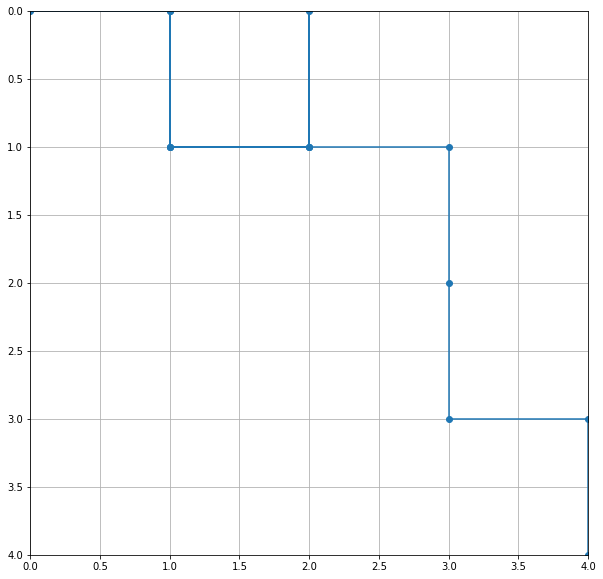

In [27]:
plt.figure(figsize=(10,10))
plt.plot(path_x, path_y, marker = 'o', linestyle='-')
plt.xlim(0, grid_width-1)
plt.ylim(0,grid_height-1)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()